In [92]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import ace_tools_open as tools
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

In [54]:
file_path = r"C:\Users\Nagham\Downloads\GP_2\final_data.xlsx"
df = pd.read_excel(file_path, sheet_name='Sheet1')

print(df.head())
print(df.tail())
print(df.info())

   R1  R2  R3  R4  R5  R6  R7  R8  I1  I2  ...  TIPI2  TIPI3  TIPI4  TIPI5  \
0   3   1   1   1   1   1   2   1   3   3  ...      5      7      7      6   
1   2   4   2   2   1   4   3   2   4   4  ...      4      6      2      6   
2   4   1   2   1   1   3   1   2   3   3  ...      4      3      3      6   
3   4   3   1   3   3   3   4   3   4   2  ...      5      7      5      7   
4   1   1   4   1   3   1   3   2   3   3  ...      6      7      5      6   

   TIPI6  TIPI7  TIPI8  TIPI9  TIPI10       major  
0      6      7      6      4       1  accounting  
1      7      5      4      7       2  accounting  
2      3      4      3      2       2  accounting  
3      1      2      4      7       1  accounting  
4      7      7      3      5       7  accounting  

[5 rows x 59 columns]
      R1  R2  R3  R4  R5  R6  R7  R8  I1  I2  ...  TIPI2  TIPI3  TIPI4  TIPI5  \
8105   2   3   1   4   2   1   3   1   2   1  ...      6      6      6      4   
8106   1   1   1   4   2   5   2  

In [55]:
print(df.isnull().sum())

R1        0
R2        0
R3        0
R4        0
R5        0
R6        0
R7        0
R8        0
I1        0
I2        0
I3        0
I4        0
I5        0
I6        0
I7        0
I8        0
A1        0
A2        0
A3        0
A4        0
A5        0
A6        0
A7        0
A8        0
S1        0
S2        0
S3        0
S4        0
S5        0
S6        0
S7        0
S8        0
E1        0
E2        0
E3        0
E4        0
E5        0
E6        0
E7        0
E8        0
C1        0
C2        0
C3        0
C4        0
C5        0
C6        0
C7        0
C8        0
TIPI1     0
TIPI2     0
TIPI3     0
TIPI4     0
TIPI5     0
TIPI6     0
TIPI7     0
TIPI8     0
TIPI9     0
TIPI10    0
major     0
dtype: int64


In [56]:
print(df.duplicated().sum())

0


In [57]:
df.drop_duplicates(inplace=True)

In [58]:
print(df.duplicated().sum())

0


In [59]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
R1,8110.0,2.557090,1.330791,0.0,1.0,3.0,3.00,5.0
R2,8110.0,2.089149,1.210416,0.0,1.0,2.0,3.00,5.0
R3,8110.0,1.746116,1.116820,0.0,1.0,1.0,2.00,5.0
R4,8110.0,2.171640,1.284582,0.0,1.0,2.0,3.00,5.0
R5,8110.0,1.710358,1.040826,0.0,1.0,1.0,2.00,5.0
R6,8110.0,2.192109,1.255728,0.0,1.0,2.0,3.00,5.0
R7,8110.0,1.960049,1.150156,0.0,1.0,2.0,3.00,5.0
R8,8110.0,1.961036,1.161817,0.0,1.0,2.0,3.00,5.0
I1,8110.0,3.420222,1.304530,0.0,3.0,4.0,4.00,5.0
I2,8110.0,3.304192,1.357556,0.0,2.0,4.0,4.00,5.0


In [60]:
major_unique_values = df['major'].value_counts().reset_index()
major_unique_values.columns = ['Major', 'Count']

tools.display_dataframe_to_user("Unique Values in Major Column", major_unique_values)

Unique Values in Major Column


In [61]:
corrections = {
    "performing arts": "art",
    "visual arts": "art",
    "liberal arts": "art",
    "philosophy art": "art",
    "architecture": "Architectural Engineering",
    "architectural": "Architectural Engineering",
    "architect": "Architectural Engineering",
    "sharia": "islamic studies",
    "islamic law": "islamic studies",
    "writer": "Writing",
    "writing": "Writing",
    "screenwriting": "Writing",
    "playwriting": "Writing",
    "scriptwriting": "Writing",
    "professional technical writing": "Writing",
    "career guidance counseling": "Counseling",
    "guidance counseling": "Counseling",
    "guidance counselling": "Counseling",
    "couseling": "Counseling",
    "counselor": "Counseling",
    "master school counseling": "Counseling",
    "addiction counseling": "Counseling",
    "school counseling": "Counseling",
    "food engineering": "food studies",
    "food inspector": "food studies",
    "food science": "food studies",
    "chef": "food studies",
    "public health": "Health Science",
    "science health": "Health Science",
    "recreational therapy": "recreational management",
    "occupational therapy": "recreational management",
    "adult education": "Education",
    "special education": "Education",
    "teaching": "Education",
    "values education": "Education",
    "management": "Project Management",
    "property management": "Project Management",
    "resource management": "Project Management",
    "public affairs": "public policy",
    "cyber security": "information security",
    "information systems": "information technology",
    "technician": "information technology",
    "technology": "information technology",
    "social science": "social studies",
    "social pedagog": "social studies",
    "policy studies": "social studies",
    "hospitality": "health service management",
    "social justice": "social",
    "scientist": "science",
    "popular music": "music",
    "manfacturing engineering": "Manufacturing Engineering",
    'associate': 'associates',
    'life sciences': 'life science',
    "kinesiology": "Kinesiology",
    "kiniesiology": "Kinesiology",
    "phsycology": "Psychology",
    "psyshology": "Psychology",
    "pshchology": "Psychology",
    "pyschology": "Psychology",
    "sonograhpy": "Sonography",
    "photograrpy": "Photography",
    "syariah": "Sharia",
    "public adminstration": "Public Administration",
    "material science": "Materials Science",
    "mechanical engineeting": "Mechanical Engineering",
    "markiting": "Marketing",
    "media studies": "Mass Communication",
    "international affairs": "International Relations",
    "international studies": "International Relations",
    "social anthropology": "Anthropology",
    "social ecology": "Ecology",
    "social policy": "Policy Studies",
    "occupational therpay": "Occupational Therapy",
    "sicology": "Sociology",
    "youthsocial": "Youth Social Work",
    "speech pathologiy": "Speech Pathology",
    "acter": "Actor",
    "areospace engineering": "Aerospace Engineering",
    "lingusitics": "Linguistics",
    "managemant": "Management",
    "multimedia": "Multimedia Studies",
    "occupational therapy": "Recreational Therapy",
    "social": "Social Studies",
    "compuer science": "Computer Science",
    "coumputer science": "Computer Science",
    "flight attadant": "Flight Attendant",
    "forenic": "Forensic",
    "nano technology": "Nanotechnology",
    "recreational therapy": "Recreational Management",
    "theater": "Theatre",
    "business administration": "Management"
}

df['major'] = df['major'].replace(corrections)
df.drop(df[df['major'] == 'undecided'].index, inplace=True)

In [62]:
df['major'] = df['major'].str.strip().str.lower()

In [63]:
import difflib

unique_words = df['major'].unique()
for word in unique_words:
    matches = difflib.get_close_matches(word, unique_words, n=3, cutoff=0.9)
    print(f"Matches for {word}: {matches}")

Matches for accounting: ['accounting']
Matches for counseling: ['counseling']
Matches for education: ['education']
Matches for art: ['art']
Matches for project management: ['project management']
Matches for civil engineering: ['civil engineering']
Matches for computer science: ['computer science']
Matches for criminalogy: ['criminalogy']
Matches for economy: ['economy']
Matches for electrical engineering: ['electrical engineering']
Matches for engineering: ['engineering']
Matches for finance: ['finance']
Matches for health science: ['health science']
Matches for history: ['history']
Matches for human resources: ['human resources']
Matches for languages: ['languages']
Matches for law: ['law']
Matches for marketing: ['marketing']
Matches for mass communication: ['mass communication']
Matches for math: ['math']
Matches for mechanical engineering: ['mechanical engineering']
Matches for music: ['music']
Matches for nursing: ['nursing']
Matches for psychology: ['psychology']
Matches for poli

In [64]:
unique_majors = df['major'].unique()
unique_majors

array(['accounting', 'counseling', 'education', 'art',
       'project management', 'civil engineering', 'computer science',
       'criminalogy', 'economy', 'electrical engineering', 'engineering',
       'finance', 'health science', 'history', 'human resources',
       'languages', 'law', 'marketing', 'mass communication', 'math',
       'mechanical engineering', 'music', 'nursing', 'psychology',
       'political science', 'science', 'sociology', 'social work'],
      dtype=object)

In [65]:
similar_majors = []
for i, major in enumerate(unique_majors):
    for j in range(i + 1, len(unique_majors)):
        if abs(len(major) - len(unique_majors[j])) <= 2:
            if major in unique_majors[j] or unique_majors[j] in major:
                similar_majors.append((major, unique_majors[j]))

similar_majors_df = pd.DataFrame(similar_majors, columns=['Major 1', 'Major 2'])
tools.display_dataframe_to_user("Potential Typographical Errors in Majors", similar_majors_df)

Potential Typographical Errors in Majors


In [66]:
major_cleaned_unique_values = df['major'].value_counts().reset_index()
major_cleaned_unique_values.columns = ['Major', 'Count']

tools.display_dataframe_to_user("Cleaned Unique Values in Major Column After Standardization", major_cleaned_unique_values)

Cleaned Unique Values in Major Column After Standardization


In [67]:
print(df['major'].value_counts())

major
psychology                2308
languages                  686
project management         685
education                  416
nursing                    323
art                        274
mass communication         244
computer science           225
accounting                 223
engineering                222
criminalogy                209
civil engineering          184
economy                    183
counseling                 179
history                    153
marketing                  150
law                        143
finance                    134
math                       132
music                      126
sociology                  123
science                    118
political science          118
social work                117
mechanical engineering     116
electrical engineering     109
health science             108
human resources            102
Name: count, dtype: int64


In [68]:
print(df.duplicated().sum())

0


In [69]:
print(df['major'].value_counts().head(10))

major
psychology            2308
languages              686
project management     685
education              416
nursing                323
art                    274
mass communication     244
computer science       225
accounting             223
engineering            222
Name: count, dtype: int64


In [70]:
print(df['major'].value_counts().tail(10))

major
math                      132
music                     126
sociology                 123
science                   118
political science         118
social work               117
mechanical engineering    116
electrical engineering    109
health science            108
human resources           102
Name: count, dtype: int64


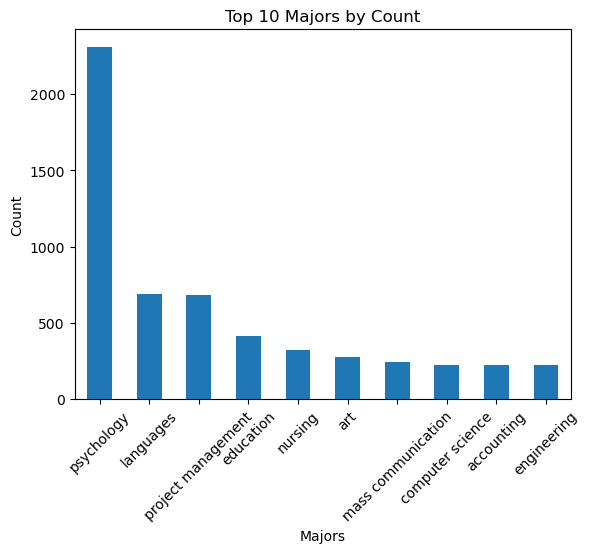

In [71]:
import matplotlib.pyplot as plt

df['major'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Majors by Count')
plt.ylabel('Count')
plt.xlabel('Majors')
plt.xticks(rotation=45)
plt.show()

In [72]:
data = df.copy()

top_majors = df['major'].value_counts()
top_majors = top_majors[top_majors > 100].index

data = df[df['major'].isin(top_majors)]

print("Top Majors (More than 100 occurrences):")
print(top_majors)

data.head()

Top Majors (More than 100 occurrences):
Index(['psychology', 'languages', 'project management', 'education', 'nursing',
       'art', 'mass communication', 'computer science', 'accounting',
       'engineering', 'criminalogy', 'civil engineering', 'economy',
       'counseling', 'history', 'marketing', 'law', 'finance', 'math', 'music',
       'sociology', 'science', 'political science', 'social work',
       'mechanical engineering', 'electrical engineering', 'health science',
       'human resources'],
      dtype='object', name='major')


,R1,R2,R3,R4,R5,R6,R7,R8,I1,I2,...,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10,major
0,3,1,1,1,1,1,2,1,3,3,...,5,7,7,6,6,7,6,4,1,accounting
1,2,4,2,2,1,4,3,2,4,4,...,4,6,2,6,7,5,4,7,2,accounting
2,4,1,2,1,1,3,1,2,3,3,...,4,3,3,6,3,4,3,2,2,accounting
3,4,3,1,3,3,3,4,3,4,2,...,5,7,5,7,1,2,4,7,1,accounting
4,1,1,4,1,3,1,3,2,3,3,...,6,7,5,6,7,7,3,5,7,accounting
